# Exploratory Data Analysis

In [1]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
from scipy import stats
from scipy.stats import zscore

In [2]:
# Read in the data
data = pd.read_csv('./dataset/clean_data.csv', )

In [3]:
# Preview the first 5 rows
data.head()

,Unnamed: 0,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,5,33181,74489,83,0,67.0,27.56,0,Caucasian,M,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic


In [4]:
# Drop first column
data = data.drop(columns='Unnamed: 0')

In [5]:
# Preview first 5 rows again
data.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,33181,74489,83,0,67.0,27.56,0,Caucasian,M,190.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic


In [6]:
# The shape of the data
print("This dataset has ", data.shape[0], " rows and ", data.shape[1], " columns.")

This dataset has  82965  rows and  186  columns.


## Univariate Analysis

/Users/oghenevwedeagboro-jimoh/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Hospital Deaths')

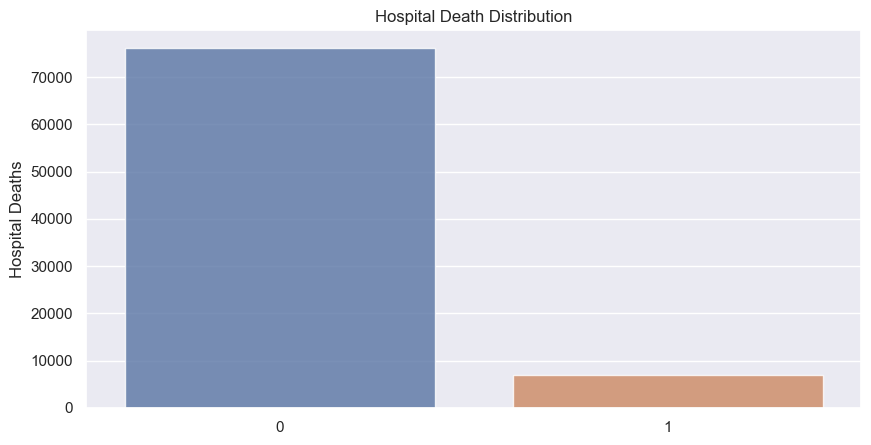

In [7]:
# Plot the hospital_death
status = data['hospital_death'].value_counts()

plt.figure(figsize=(10,5), dpi = 100)
sns.barplot(status.index, status.values, alpha = 0.8)
plt.title('Hospital Death Distribution')
plt.ylabel('Number of Ocurrences', fontsize = 12)
plt.ylabel('Hospital Deaths', fontsize = 12)

From the figure, it can be seen that fewer people have died during stay in the ICU. This means that if we model the data, it most likely will predict the majority class which is '0'. Thus I would need to do some sampling when modelling the data since it is unbalanced.

In [8]:
## Explore the Age
data['age'].describe()

count    82965.000000
mean        62.355897
std         16.751005
min         16.000000
25%         52.000000
50%         65.000000
75%         75.000000
max         89.000000
Name: age, dtype: float64

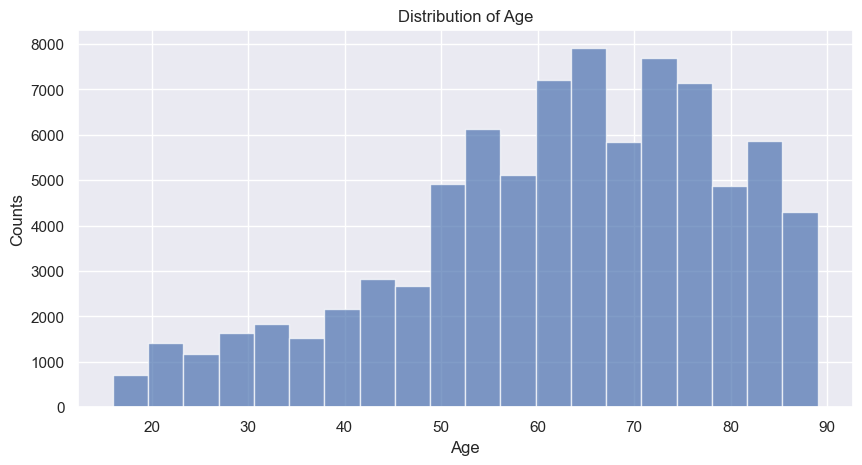

In [9]:
## Plot the distribution of the age
plt.figure(figsize=(10,5), dpi = 100)
data['age'].plot.hist(bins = 20, alpha = 0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Counts');

/Users/oghenevwedeagboro-jimoh/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


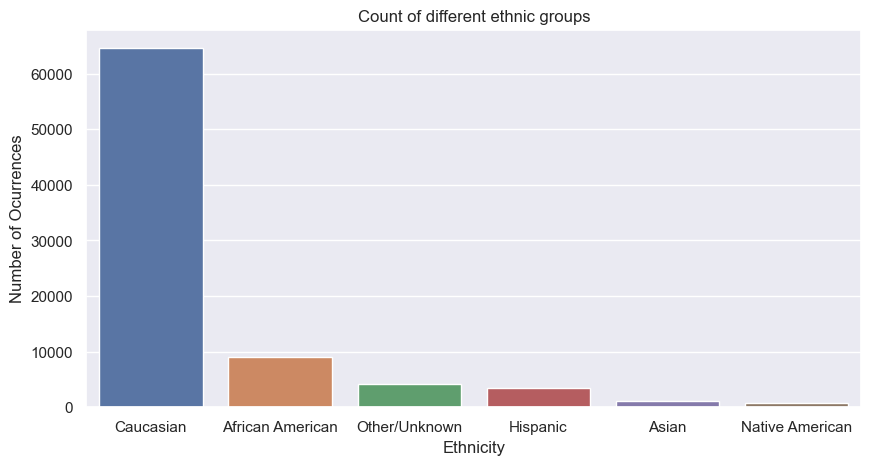

In [28]:
# Plot the ethnicity
ethnicity_count = data['ethnicity'].value_counts()
plt.figure(figsize=(10,5), dpi = 100)
sns.barplot(ethnicity_count.index, ethnicity_count.values)
plt.title('Count of different ethnic groups')
plt.xlabel('Ethnicity', fontsize = 12)
plt.ylabel('Number of Ocurrences', fontsize = 12);

From the chart above, we can see that Caucasians make up the majority of the population in the data set, and this is followed by the African Americans. Conversely, Native Americans are almost non-existent in this population.

In [11]:
# Explore the Hospital Admit Source
data['hospital_admit_source'].value_counts()

Emergency Department    32892
Operating Room           9025
Floor                    7178
Direct Admit             5723
Recovery Room            2755
Acute Care/Floor         1685
Other Hospital           1496
Step-Down Unit (SDU)     1078
PACU                      970
Other ICU                 220
Chest Pain Center         121
ICU to SDU                 42
ICU                        35
Observation                10
Other                       5
Name: hospital_admit_source, dtype: int64

In [12]:
# Explore the Hospital Admit Source
data['hospital_admit_source'].describe()

count                    63235
unique                      15
top       Emergency Department
freq                     32892
Name: hospital_admit_source, dtype: object

/Users/oghenevwedeagboro-jimoh/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


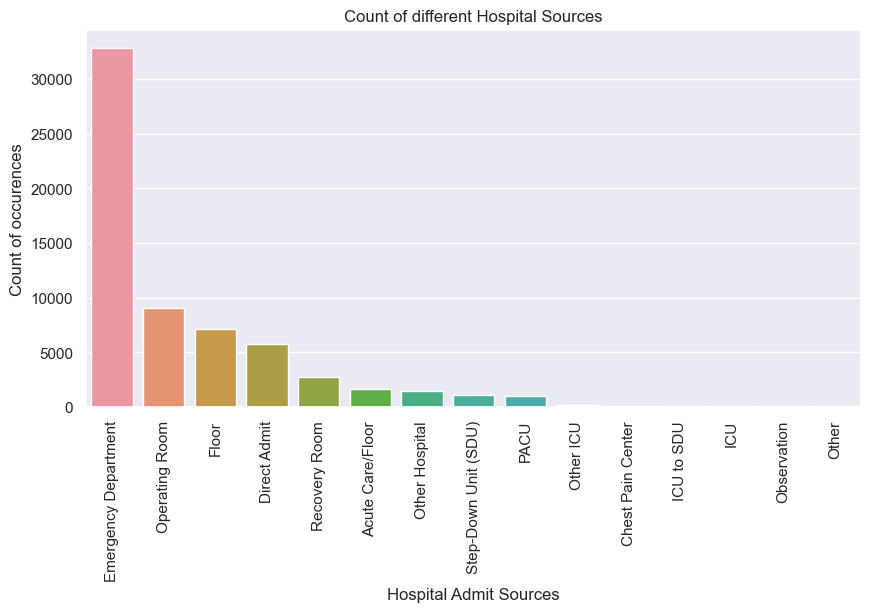

In [13]:
# Plot a count of the hospital admit sources
hospital_admit = data['hospital_admit_source'].value_counts()
plt.figure(figsize=(10,5), dpi = 100)
sns.barplot(hospital_admit.index, hospital_admit.values)
plt.title('Count of different Hospital Sources')
plt.xlabel('Hospital Admit Sources', fontsize = 12)
plt.ylabel('Count of occurences', fontsize = 12)
plt.xticks(rotation = 'vertical');

/Users/oghenevwedeagboro-jimoh/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


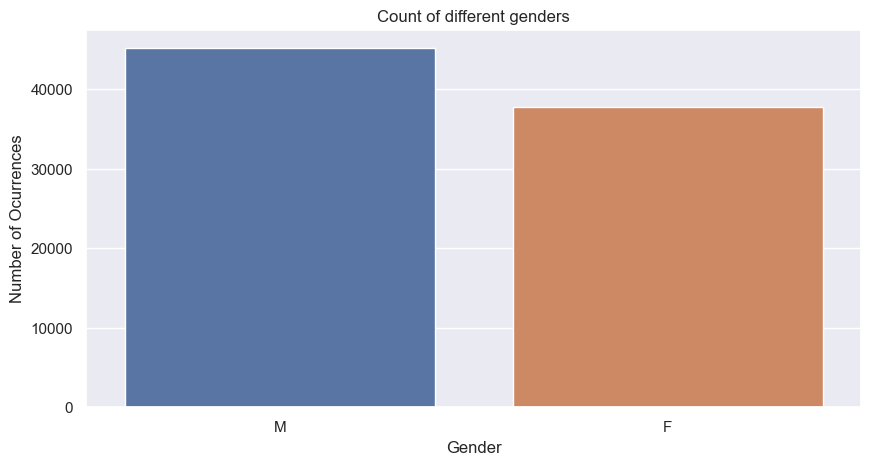

In [29]:
# Univariate plot of gender
gender = data['gender'].value_counts()
plt.figure(figsize=(10,5), dpi = 100)
sns.barplot(gender.index, gender.values)
plt.title('Count of different genders')
plt.ylabel('Number of Ocurrences', fontsize = 12)
plt.xlabel('Gender', fontsize = 12);

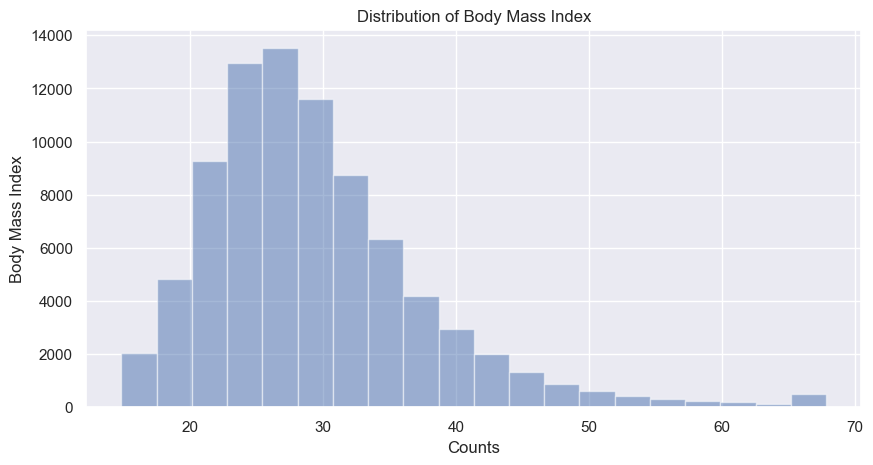

In [15]:
# Distribution of body mass index (bmi)
plt.figure(figsize=(10,5), dpi = 100)
data['bmi'].plot.hist(bins = 20, alpha = 0.5)
plt.title('Distribution of Body Mass Index')
plt.xlabel('Counts')
plt.ylabel('Body Mass Index');

Text(0, 0.5, 'Counts')

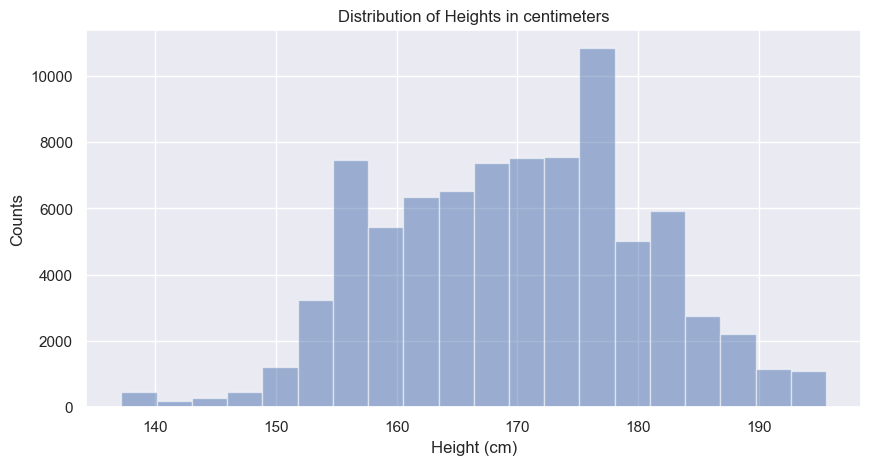

In [16]:
# Distribution of Heights
plt.figure(figsize=(10,5), dpi = 100)
data['height'].plot.hist(bins = 20, alpha = 0.5)
plt.title('Distribution of Heights in centimeters')
plt.xlabel('Height (cm)')
plt.ylabel('Counts')

/Users/oghenevwedeagboro-jimoh/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


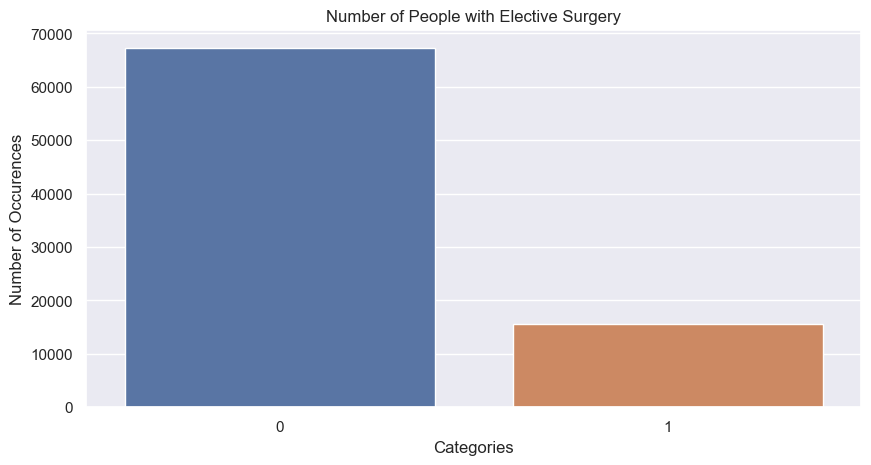

In [17]:
# Univariate plot of elective surgery
surgery = data['elective_surgery'].value_counts()
plt.figure(figsize=(10,5), dpi = 100)
sns.barplot(surgery.index, surgery.values)
plt.title('Number of People with Elective Surgery')
plt.xlabel('Categories', fontsize = 12)
plt.ylabel('Number of Occurences', fontsize = 12);

## Bivariate Analysis

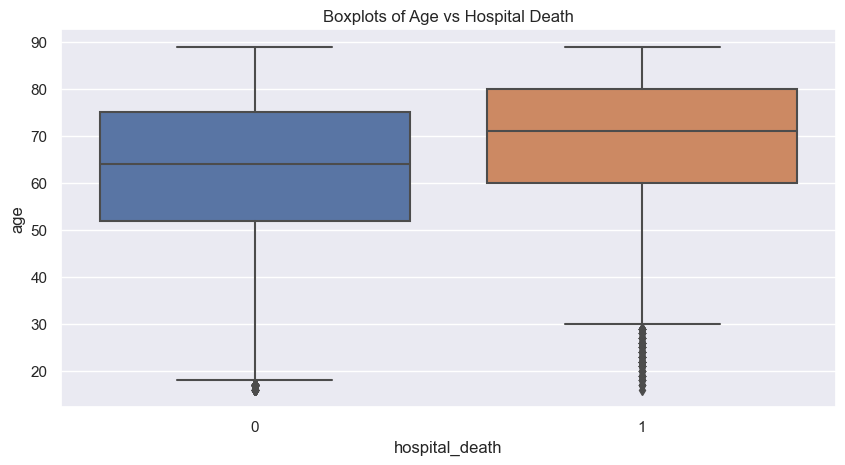

In [18]:
# Plot of age vs hospital death
plt.figure(figsize=(10,5), dpi = 100)
sns.boxplot(x = 'hospital_death', y = 'age', data = data)
plt.title('Boxplots of Age vs Hospital Death');

In [19]:
# # Plot of Gender and Hospital Deaths
# fig, ax =plt.subplots(1,2)
# sns.countplot(data['hospital_death'], ax=ax[0])
# sns.countplot(data['gender'], ax=ax[1])

<Figure size 2400x1400 with 0 Axes>

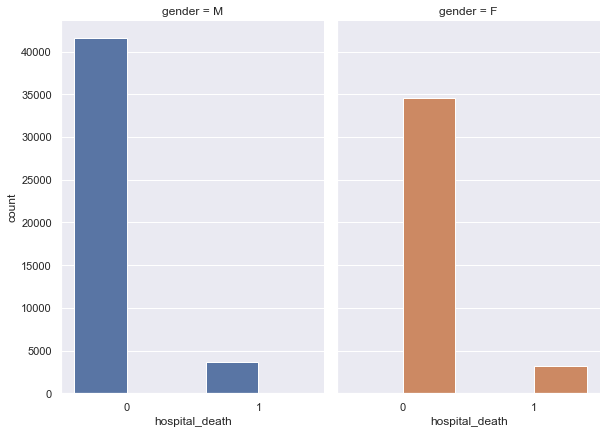

In [20]:
# Plot of Gender and Hospital Deaths
plt.figure(figsize=(12,7), dpi = 200)
ax = sns.catplot(x="hospital_death", hue="gender", col = 'gender',
                data=data, kind="count",
                height=6, aspect=.7);

Survival in the ICU tends to affect more men than women. There are also more male deaths than female deaths in the ICU.

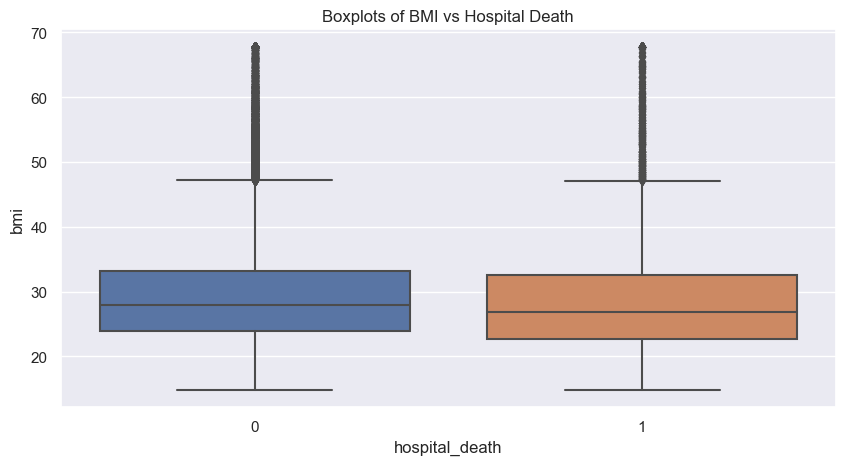

In [21]:
plt.figure(figsize=(10,5), dpi = 100)
sns.boxplot(x = 'hospital_death', y = 'bmi', data = data)
plt.title('Boxplots of BMI vs Hospital Death');

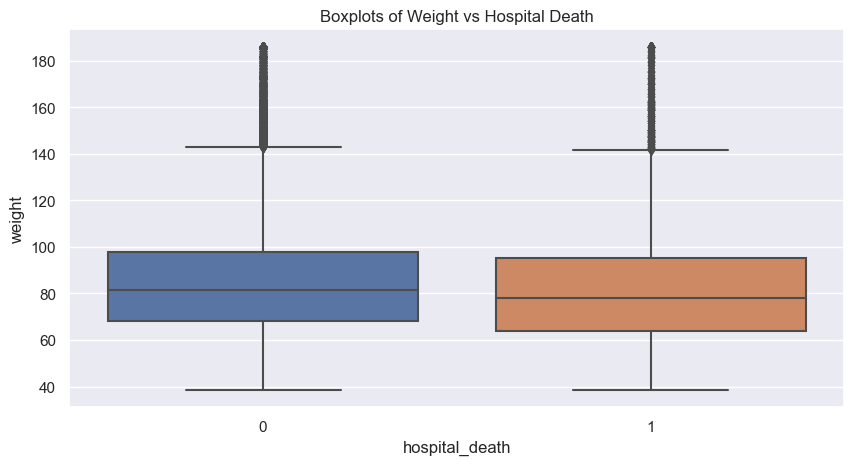

In [22]:
plt.figure(figsize=(10,5), dpi = 100)
sns.boxplot(x = 'hospital_death', y = 'weight', data = data)
plt.title('Boxplots of Weight vs Hospital Death');

<Figure size 1000x500 with 0 Axes>

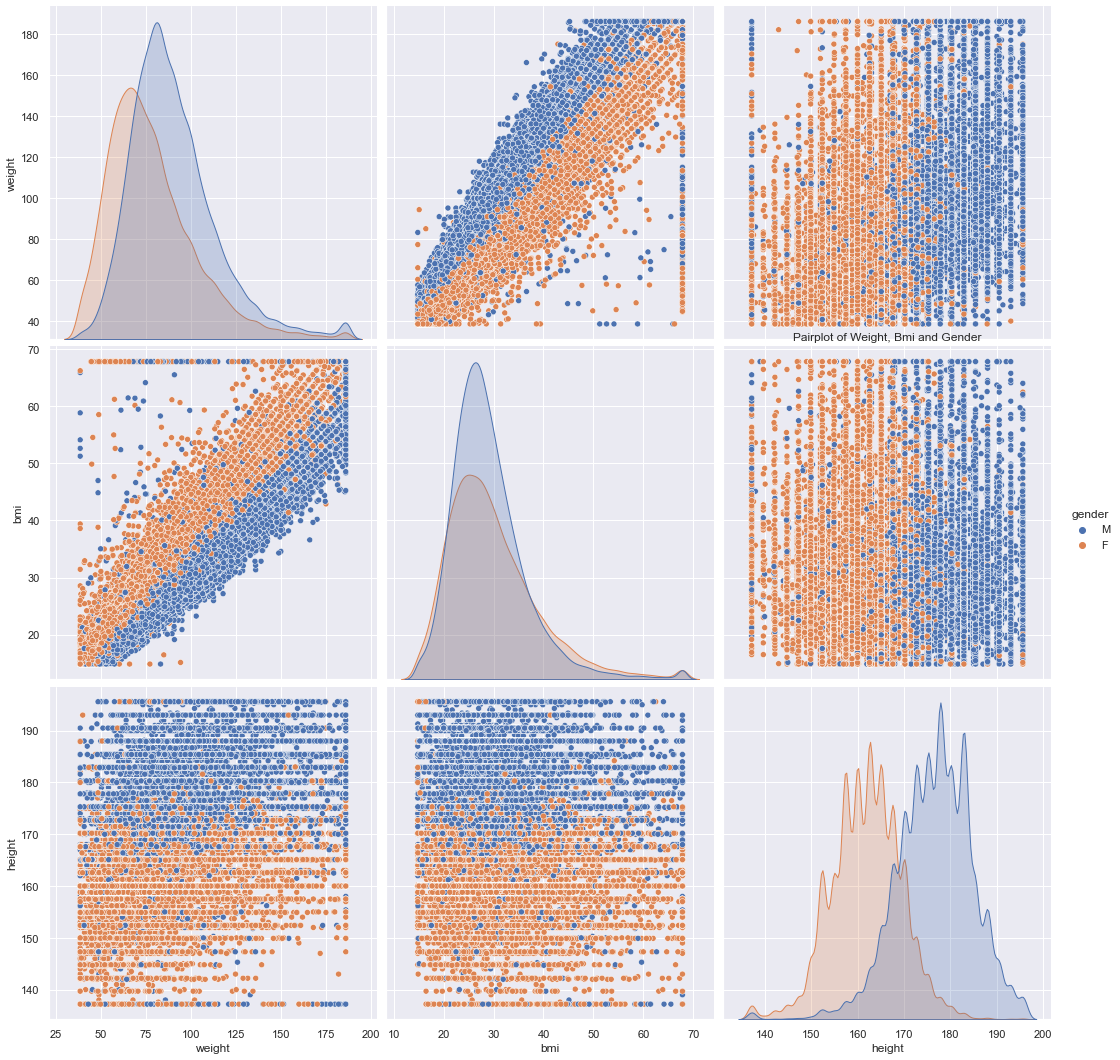

In [23]:
# Categorical columns
plt.figure(figsize=(10,5), dpi = 100)
cols = data[['weight', 'bmi', 'gender', 'height']]
sns.pairplot(data = cols, hue = 'gender', height = 5.0)
plt.title('Pairplot of Weight, Bmi and Gender');

The pairplot above shows that among the male and female gender, there is a strong correlation between body mass index and weight of a person. While there is no correlation between the weight and height of a person.

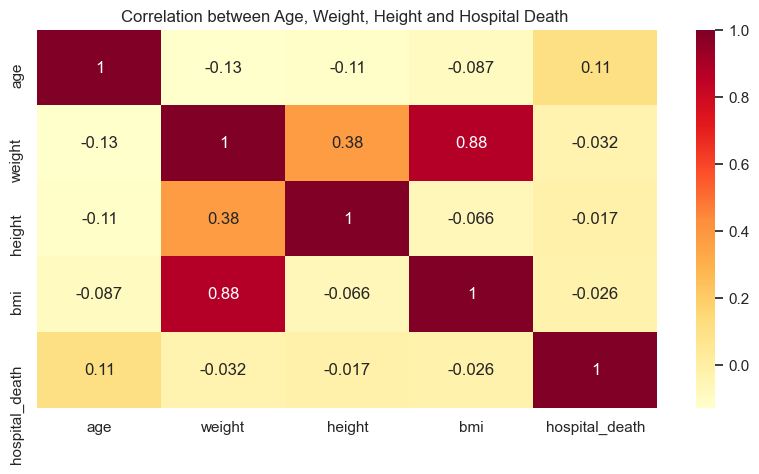

In [24]:
# Heatmap to investigate the correlation among variables
plt.figure(figsize=(10,5), dpi = 100)
cols = data[['age', 'weight', 'height', 'bmi', 'hospital_death']]
sns.heatmap(cols.corr(), annot = True, cmap = 'YlOrRd')
plt.title('Correlation between Age, Weight, Height and Hospital Death ');

The heatmap above strongly confirms the earlier theory that weight and body mass index are strongly correlated. However, hospital deaths our target variable shows no strong correlation to any of these variables. It is even negatively correlated to them except for age! 

/Users/oghenevwedeagboro-jimoh/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


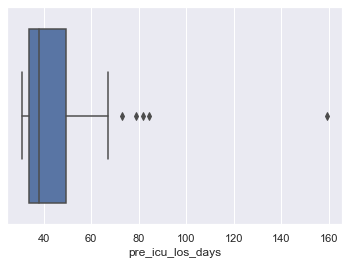

In [25]:
# Drop outliers and plot The ICU Days
cols = data.loc[data['pre_icu_los_days'] > 30]
sns.boxplot(cols['pre_icu_los_days'])